In [22]:
import pandas as pd 
institution_details = pd.read_csv('cc_institution_details.csv')
institution_grads = pd.read_csv('cc_institution_grads.csv')
statesector_grads = pd.read_csv('cc_state_sector_grads.csv')




In [2]:
institution_details.head(3)

,unitid,chronname,city,state,level,control,basic,hbcu,flagship,long_x,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.568502,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,-86.809170,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,-86.174010,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0


In [3]:
institution_grads.head(3)

,unitid,year,gender,race,cohort,grad_cohort,grad_100,grad_150,grad_100_rate,grad_150_rate
0,100760,2011,B,X,2y all,446.0,73.0,105.0,16.4,23.5
1,100760,2011,M,X,2y all,185.0,NaN,40.0,NaN,21.6
2,100760,2011,F,X,2y all,261.0,NaN,65.0,NaN,24.9


In [4]:
statesector_grads.head()

,stateid,state,state_abbr,control,level,year,gender,race,cohort,grad_cohort,grad_100,grad_150,grad_100_rate,grad_150_rate,grad_cohort_ct
0,1,Alabama,AL,Private for-profit,4-year,2011,B,A,4y bach,0,0.0,0,NaN,NaN,9
1,1,Alabama,AL,Private for-profit,4-year,2011,B,Ai,4y bach,1,0.0,0,0.0,0.0,9
2,1,Alabama,AL,Private for-profit,4-year,2011,B,B,4y bach,51,2.0,3,3.9,5.9,9
3,1,Alabama,AL,Private for-profit,4-year,2011,B,H,4y bach,1,0.0,0,0.0,0.0,9
4,1,Alabama,AL,Private for-profit,4-year,2011,B,W,4y bach,66,15.0,18,22.7,27.3,9


In [5]:
#both institution grads & institution details have a ID by instiuttion, let's join them so we can compare 
# we only care about institutional information if we have student data, so we'll do a one-sided join
grads_details = pd.merge(institution_details, institution_grads, on ='unitid', how = 'right')
grads_details.head(3)

,unitid,chronname,city,state,level,control,basic,hbcu,flagship,long_x,...,cohort_size,year,gender,race,cohort,grad_cohort,grad_100,grad_150,grad_100_rate,grad_150_rate
0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.568502,...,882.0,2011,B,X,4y other,NaN,NaN,NaN,NaN,NaN
1,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.568502,...,882.0,2011,M,X,4y other,NaN,NaN,NaN,NaN,NaN
2,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.568502,...,882.0,2011,F,X,4y other,NaN,NaN,NaN,NaN,NaN


In [6]:
#filling with 0 categorical variables that don't have data
grads_details['hbcu'].fillna(0)
grads_details['flagship'].fillna(0);



In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

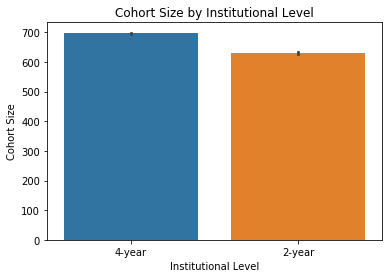

In [29]:
#lets look at co-hort size by level 
sns.barplot(x = 'level', y = 'cohort_size',data = grads_details);
plt.xlabel('Institutional Level');
plt.ylabel('Cohort Size');
plt.title('Cohort Size by Institutional Level');


In [31]:
#this doesn't tell us much! We only have two categories. Generally institutions are described by their level AND control- let's try that!

grads_details['type'] = grads_details['level'].map(str) + grads_details['control']
grads_details.head()

,unitid,chronname,city,state,level,control,basic,hbcu,flagship,long_x,...,year,gender,race,cohort,grad_cohort,grad_100,grad_150,grad_100_rate,grad_150_rate,type
0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.568502,...,2011,B,X,4y other,NaN,NaN,NaN,NaN,NaN,4-yearPublic
1,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.568502,...,2011,M,X,4y other,NaN,NaN,NaN,NaN,NaN,4-yearPublic
2,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.568502,...,2011,F,X,4y other,NaN,NaN,NaN,NaN,NaN,4-yearPublic
3,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.568502,...,2011,B,W,4y other,NaN,NaN,NaN,NaN,NaN,4-yearPublic
4,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.568502,...,2011,M,W,4y other,NaN,NaN,NaN,NaN,NaN,4-yearPublic


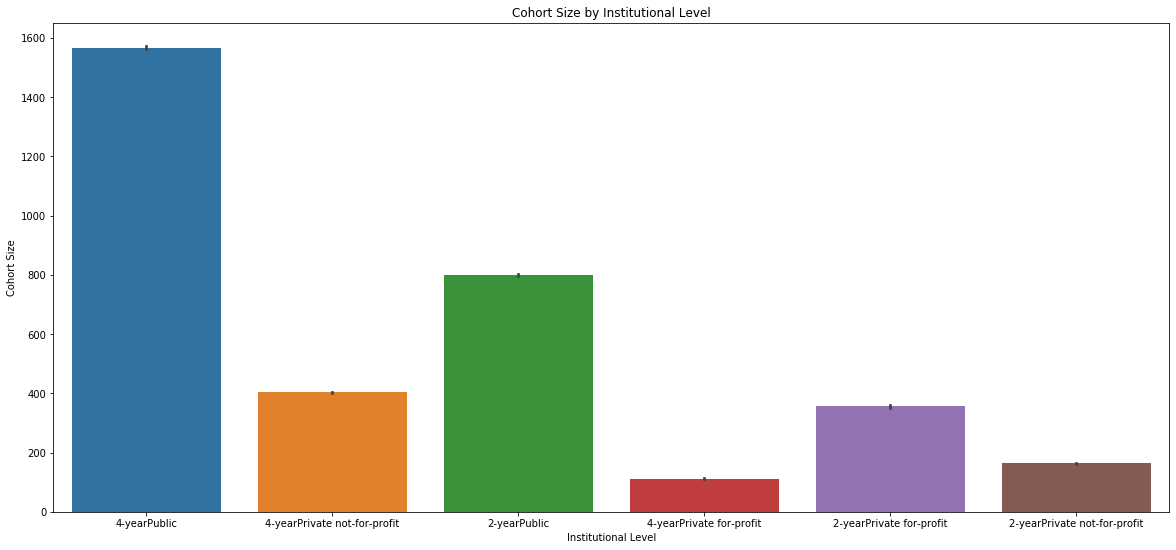

In [37]:
#let's try the graph again
plt.figure(figsize=(20,9))
sns.barplot(x = 'type', y = 'cohort_size',data = grads_details);
plt.xlabel('Institutional Level');
plt.ylabel('Cohort Size');
plt.title('Cohort Size by Institutional Level');
#More interesting -- and fits better with the way education professionals speak about institutions

In [4]:
#let's look at state sector grads
statesector_grads.head()

,stateid,state,state_abbr,control,level,year,gender,race,cohort,grad_cohort,grad_100,grad_150,grad_100_rate,grad_150_rate,grad_cohort_ct
0,1,Alabama,AL,Private for-profit,4-year,2011,B,A,4y bach,0,0.0,0,NaN,NaN,9
1,1,Alabama,AL,Private for-profit,4-year,2011,B,Ai,4y bach,1,0.0,0,0.0,0.0,9
2,1,Alabama,AL,Private for-profit,4-year,2011,B,B,4y bach,51,2.0,3,3.9,5.9,9
3,1,Alabama,AL,Private for-profit,4-year,2011,B,H,4y bach,1,0.0,0,0.0,0.0,9
4,1,Alabama,AL,Private for-profit,4-year,2011,B,W,4y bach,66,15.0,18,22.7,27.3,9


In [72]:
#do we think grad rates are higher by type of institution?
statesector_grads['type'] = statesector_grads['level'].map(str) + statesector_grads['control']

rates_by_type = statesector_grads.groupby('type').agg({'grad_100_rate':['mean'],'grad_150_rate':['mean']})

In [73]:
rates_by_type

,grad_100_rate,grad_150_rate
,mean,mean
type,,
2-yearPrivate for-profit,0.961337,53.110749
2-yearPrivate not-for-profit,0.736926,30.818613
2-yearPublic,0.279966,18.285839
4-yearPrivate for-profit,7.499167,29.231696
4-yearPrivate not-for-profit,21.398573,42.539271
4-yearPublic,12.811548,35.451891


In [74]:
#This might be better if we group by level and THEN control 

statesector_grads.groupby(['level','control']).agg({'grad_100_rate':['mean'],'grad_150_rate':['mean']})


grad_100_rate grad_150_rate
                                       mean          mean
level  control                                           
2-year Private for-profit          0.961337     53.110749
       Private not-for-profit      0.736926     30.818613
       Public                      0.279966     18.285839
4-year Private for-profit          7.499167     29.231696
       Private not-for-profit     21.398573     42.539271
       Public                     12.811548     35.451891

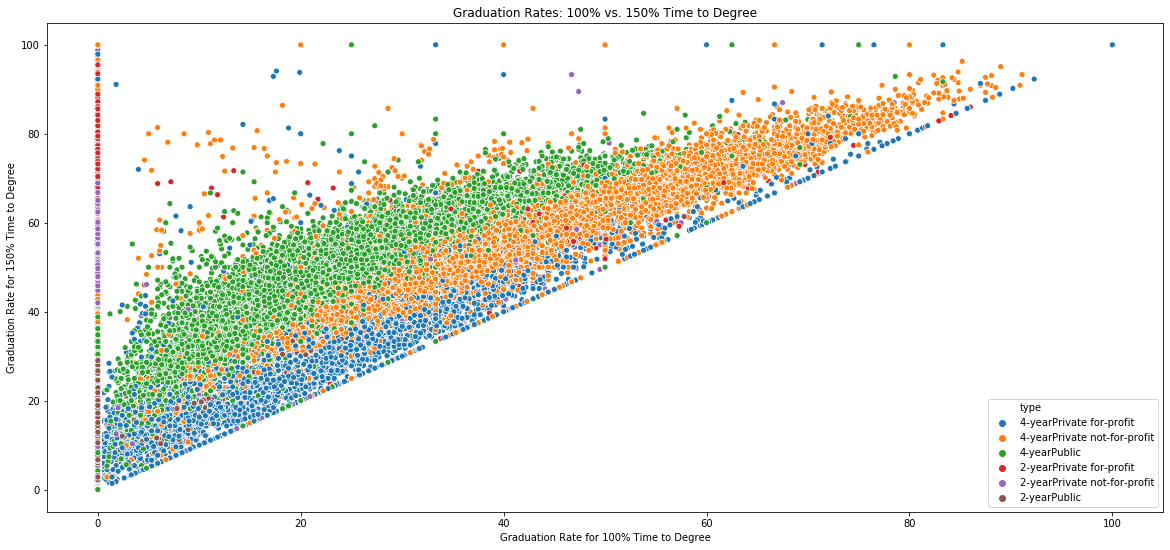

In [75]:
#grad rates are best for 2 year private-for-profit on both grad rates. Can we see if grad 100% rate & grad 150 rate are related?
plt.figure(figsize=(20,9))
sns.scatterplot(x='grad_100_rate',y = 'grad_150_rate', data = statesector_grads, hue='type');
plt.xlabel('Graduation Rate for 100% Time to Degree')
plt.ylabel("Graduation Rate for 150% Time to Degree")
plt.title("Graduation Rates: 100% vs. 150% Time to Degree");


In [26]:
#Looks like private for profits are unlikely to graduate students after they reach 100% time to degree
#Public school students are more likely to continue after hitting 100% time to degree
#let's see how correlated 100 grad rate is to 150 grad rate overall
#First, let's look at some metrics:

mean100=statesector_grads['grad_100_rate'].mean()
median100=statesector_grads['grad_100_rate'].median()
max100=statesector_grads['grad_100_rate'].max()
min100=statesector_grads['grad_100_rate'].min()

mean150=statesector_grads['grad_150_rate'].mean()
median150=statesector_grads['grad_150_rate'].median()
max150=statesector_grads['grad_150_rate'].max()
min150=statesector_grads['grad_150_rate'].min()


listplease = [['Mean', mean100], ['Median', median100], ['Max', max100],['Min',min100]] 
listplease2 = [ mean150, median150, max150,min150] 
  
table_of_metrics = pd.DataFrame(listplease, columns = ['Name', 'Grad Rate 100']) 
  
table_of_metrics['Grad Rate 150'] = listplease2
table_of_metrics

,Name,Grad Rate 100,Grad Rate 150
0,Mean,28.254796,39.426019
1,Median,25.800000,39.400000
2,Max,100.000000,100.000000
3,Min,0.000000,0.000000


In [27]:
#great! Time to model. 

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

statesector_grads[['grad_100','grad_100_rate','grad_150_rate']]=statesector_grads[['grad_100','grad_100_rate','grad_150_rate']].fillna(value=0)


In [66]:
X = statesector_grads[['grad_100_rate','grad_100']]
y = statesector_grads['grad_150_rate']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 8451)

In [67]:
model = LinearRegression(fit_intercept = True)

In [69]:
model.fit(Xtrain, ytrain);
model.score(Xtest, ytest)

0.21663993295828998

In [ ]:
#Not a great predictor!